# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import PolynomialFeatures

# Dataset Import

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hafeezabro/ushape")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ushape


In [4]:
df = pd.read_csv(f"{path}/ushape.csv")
df.columns = ["x", "y", "label"]
df.sample(5)

,x,y,label
98,-1.296818,0.184147,0.0
30,1.056146,-1.035702,1.0
17,-0.237125,0.778760,0.0
54,0.195363,0.160851,1.0
5,0.569693,0.337441,0.0


# Visulization

<Axes: xlabel='x', ylabel='y'>

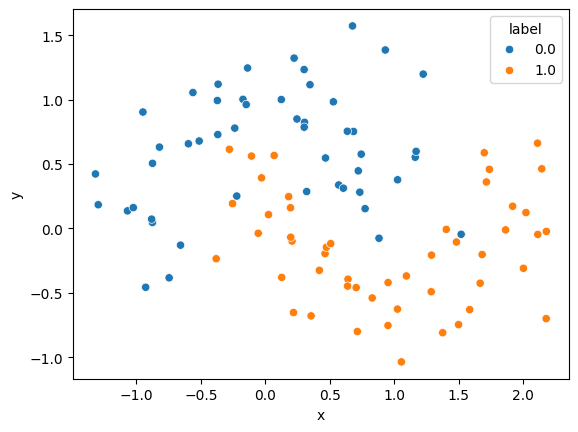

In [5]:
sns.scatterplot(x="x", y="y", hue="label", data=df)

# Train Test Split

In [12]:
X = df.iloc[:, :2].array
y = df.iloc[:, -1]

AttributeError: 'DataFrame' object has no attribute 'array'

In [7]:
X.shape, y.shape

((99, 2), (99,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Simple Logistic Regression

In [9]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.95

# Show  the Result visulized

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

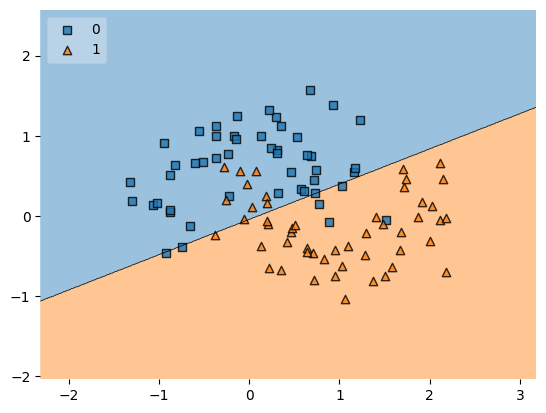

In [14]:
plot_decision_regions(X.values, y.values.astype('int'), clf, legend=2)

# Polynomial Logistic Regression

In [16]:
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [18]:
X_trf.shape

(99, 9)

In [19]:
clf2 = LogisticRegression()
clf2.fit(X_trf, y)

LogisticRegression()

In [20]:
accuracy_score(y, clf2.predict(X_trf))

0.9191919191919192

# Make a Function for Simplify this

In [30]:
plot_decision_boundary(X,y,degree=2)

InvalidIndexError: (slice(None, None, None), 0)

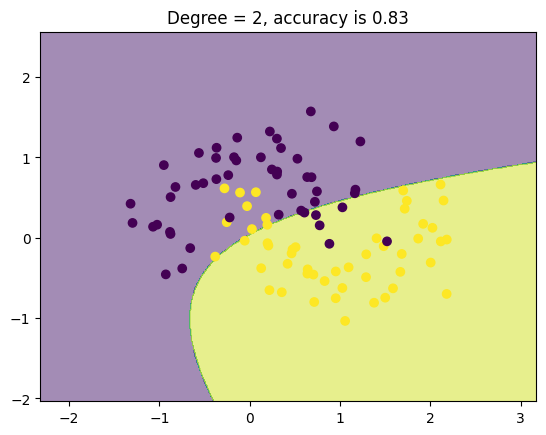

In [31]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from mlxtend.plotting import plot_decision_regions
# from sklearn.preprocessing import PolynomialFeatures
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("hafeezabro/ushape")

# ... (Rest of the code remains the same)

def plot_decision_boundary(X,y,degree=1):
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)
    XX,YY=np.meshgrid(a,b)
    input_array=np.array([XX.ravel(),YY.ravel()]).T
    labels=clf.predict(poly.transform(input_array))
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y) # Assuming X will be a numpy array
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

# ... (Rest of the code remains the same)

plot_decision_boundary(X.values,y,degree=2) # Call with X.values

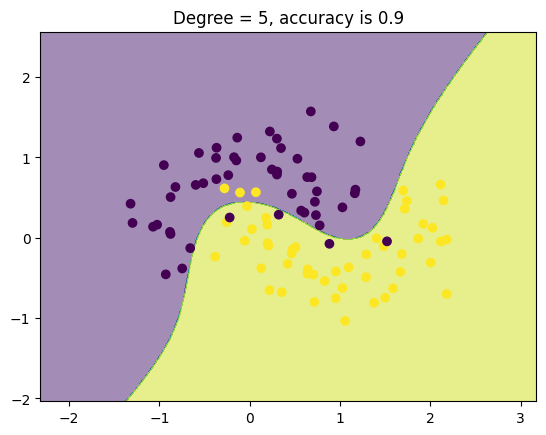

In [34]:
plot_decision_boundary(X.values,y,degree=5)